In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Load datasets
fake_real_news_df = pd.read_csv("fake_and_real_news.csv")
scraped_stock_news_df = pd.read_csv("scraped_stocks_news.csv")

In [3]:
# Prepare training data
X = fake_real_news_df["Text"]
y = fake_real_news_df["label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.7)),
    ('clf', LogisticRegression(max_iter=1000))
])

<Figure size 600x500 with 0 Axes>

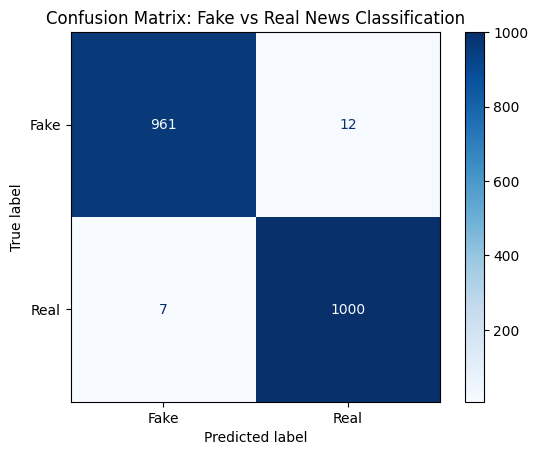

'              precision    recall  f1-score   support\n\n        Fake       0.99      0.99      0.99       973\n        Real       0.99      0.99      0.99      1007\n\n    accuracy                           0.99      1980\n   macro avg       0.99      0.99      0.99      1980\nweighted avg       0.99      0.99      0.99      1980\n'

In [4]:
# Train model
pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["Fake", "Real"])

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Fake vs Real News Classification")
plt.show()

classification_report(y_test, y_pred)

In [5]:
# Clean and predict on scraped stock news
scraped_clean = scraped_stock_news_df.dropna(subset=['Content']).copy()
scraped_clean = scraped_clean.drop("URL", axis=1)
scraped_clean["Label"] = pipeline.predict(scraped_clean["Content"])

scraped_clean.sample(10)

,Stock,Date,Headline,Content,Label
56,Darden Restaurants,4/20/2020,U.S. News & World Report,"Darden Restaurants, Inc. is a full-service res...",Real
0,Caesars Entertainment,4/13/2020,NaN,Shareholders of Caesars Entertainment would pr...,Fake
43,Devon Energy,4/17/2020,The Motley Fool,"In a nutshell, Devon Energy is an excellent st...",Real
16,Carnival Corporation,4/15/2020,Carnival Corp. stock underperforms Tuesday whe...,Shares of Carnival Corp. shed 5.80% to $21.91 ...,Real
35,Diamondback Energy,4/17/2020,MarketWatch,Shares of Diamondback Energy Inc. FANG slid 4....,Real
13,APA Corporation,4/17/2020,Yahoo Finance,we are going to take a look at where APA Corpo...,Fake
27,Occidental Petroleum,4/17/2020,Nasdaq,OCCIDENTAL PETROLEUM CORP (OXY) is a large-cap...,Real
25,Occidental Petroleum,4/17/2020,Occidental Petroleum Stock Falls After Q4 Reve...,Occidental Petroleum (OXY) shares fell 1% afte...,Fake
51,Darden Restaurants,4/20/2020,NaN,Darden Restaurants shares led S&P 500 gainers ...,Real
6,Caesars Entertainment,4/13/2020,Seeking Alpha,Caesars Entertainment (NASDAQ:CZR) edged highe...,Real


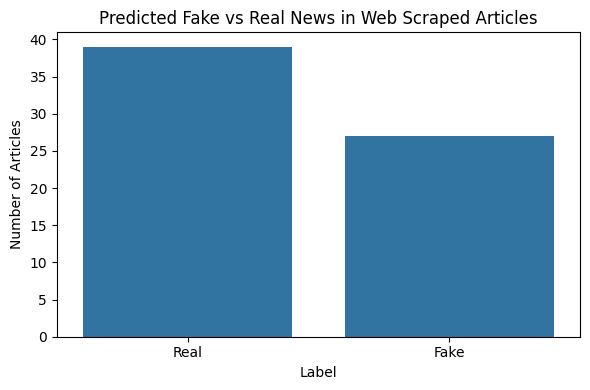

In [6]:
# Count of predicted labels
label_counts = scraped_clean["Label"].value_counts()

# Plot: Bar chart of predicted labels
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Predicted Fake vs Real News in Web Scraped Articles")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()